This file contains linear machine learning models utilizing the `scikit-learn` module

This includes:

    multiple linear regression
    lasso regression
    ridge regression
    elastic net regression
    principal component regression
    
Our target metric is *Root Mean Squared Error* (RMSE). I will also include *Mean Absolute Percentage Error* (MAPE) which can be a little easier to interpret

future implementations for you (connor): implement all regression metrics (mse, rmse, mae, mape, r-sqr), do subset selection (not really necessary)

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
# import PtitPrince as pt # tried to import a package that created raincloud plot for visualizing distributions

In [2]:
# Set pandas display precision to 4 decimal places
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(precision=4)

## Importing Data Set

In [3]:
# Importing processed dataframe
path_project = "C:/Users/Conno/Documents/Career/Projects/Hospital_Charges/linear_models"

os.chdir(path_project)
plots_dir = 'linear_model_plots' # stores plots in plot folder

df = pd.read_csv("../df_processed.csv")

# do this later in data_cleaning file
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.dtypes

age                           float64
death                           int64
hospdead                        int64
slos                            int64
d_time                          int64
edu                           float64
scoma                         float64
charges                       float64
avtisst                       float64
sps                           float64
aps                           float64
surv2m                        float64
surv6m                        float64
hday                            int64
diabetes                        int64
dementia                        int64
prg2m                         float64
prg6m                         float64
dnrday                        float64
meanbp                        float64
wblc                          float64
hrt                           float64
resp                          float64
temp                          float64
crea                          float64
sod                           float64
adlsc       

In [4]:
df["charges"].describe()

count      4834.0000
mean      55718.8947
std       95378.8365
min        1212.0000
25%        9630.5000
50%       23949.0000
75%       60868.3672
max     1273347.0000
Name: charges, dtype: float64

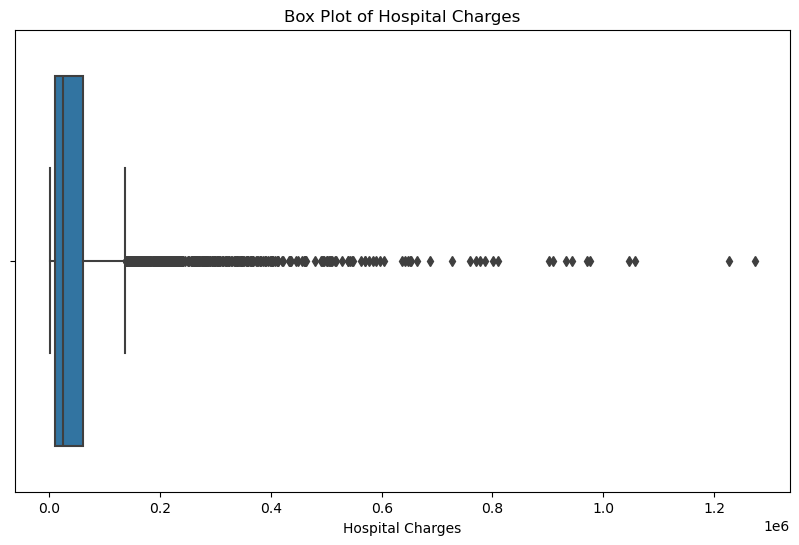

In [5]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df["charges"])
plt.title("Box Plot of Hospital Charges")
plt.xlabel("Hospital Charges")
plt.show()

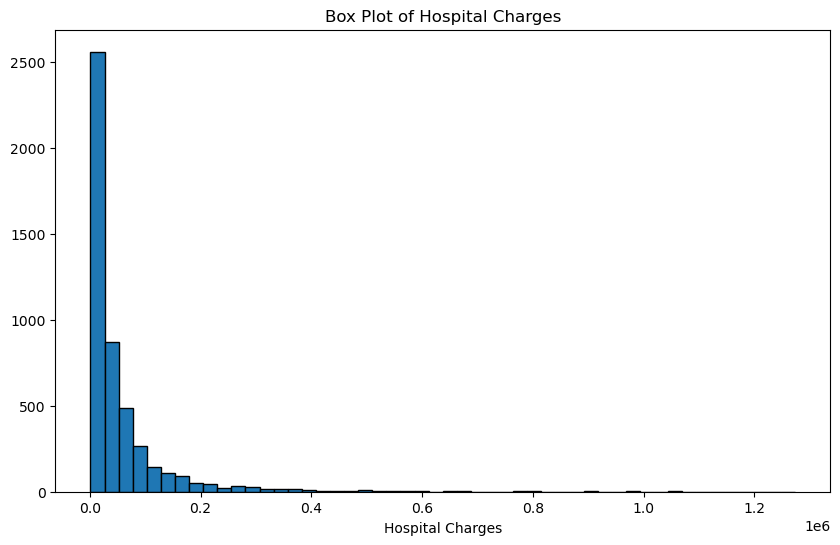

In [6]:
plt.figure(figsize = (10, 6))
plt.hist(x=df["charges"], bins = 50, edgecolor = 'k')
plt.title("Box Plot of Hospital Charges")
plt.xlabel("Hospital Charges")
plt.show()

## Train-Test Split

80-20 split

In [7]:
X = df.drop(columns = ["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Multiple Linear Regression

In [8]:
# Fitting the multiple linear regression model
multiple_lm = LinearRegression()
multiple_lm.fit(X_train, y_train)

# predicting using the model

multiple_lm_predictions = multiple_lm.predict(X_test)

# Calculating MAPE of test set
multiple_lm_mape = mean_absolute_percentage_error(y_test, multiple_lm_predictions)
print("Multiple Linear Regression MAPE:", round(multiple_lm_mape, 4))

# Calculating RMSE of test set
multiple_lm_mse = mean_squared_error(y_test, multiple_lm_predictions)
multiple_lm_rmse = np.sqrt(multiple_lm_mse)
multiple_lm_mae = mean_absolute_error(y_test, multiple_lm_predictions)
print("Multiple Linear Regression MSE:", round(multiple_lm_mse, 4))
print("Multiple Linear Regression RMSE:", round(multiple_lm_rmse, 4))
print("Multiple Linear Regression MAE:", round(multiple_lm_mae, 4))

Multiple Linear Regression MAPE: 1.1278
Multiple Linear Regression MSE: 4035445650.9683
Multiple Linear Regression RMSE: 63525.1576
Multiple Linear Regression MAE: 28892.9356


## Coefficients

In [9]:
predictor_names = X.columns
mult_lm_coeffs = multiple_lm.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, mult_lm_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key=lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -74806.2860
race_black: -36068.7755
race_white: -31993.1443
dzgroup_mosf_w_malig: -20650.0110
dzclass_coma: -19323.0453
dzgroup_coma: -19323.0453
diabetes: -13052.5518
sfdm2_sip>=30: -10900.5517
dzgroup_cirrhosis: -10255.2299
dnr_no_dnr: -9457.3729
death: -9073.1667
dementia: -8427.6690
dzgroup_lung_cancer: -7563.2557
dzclass_cancer: -6446.8199
sfdm2_no_m2_and_sip_pres_: -5139.5044
dzclass_copd_chf_cirrhosis: -5065.4219
sfdm2_adl>=4_>=5_if_sur_: -4099.9767
sex_male: -1971.2279
hospdead: -1948.2531
dzgroup_copd: -1685.1442
sps: -1319.3237
adlsc: -1083.3734
age: -589.6487
ca_yes: -283.8339
wblc: -217.5467
meanbp: -98.1873
d_time: -7.0570
hrt: 4.4819
resp: 146.4190
scoma: 227.2443
sod: 255.4888
aps: 375.6621
prg2m: 545.8644
dnrday: 1009.4615
dzgroup_colon_cancer: 1116.4359
avtisst: 1153.2949
crea: 1317.6018
slos: 1374.4861
temp: 1635.3863
edu: 2005.6947
dnr_dnr_before_sadm: 2502.4048
race_hispanic: 3050.5558
hday: 3511.4302
ca_no: 6472.8535
dzgroup_chf: 6874.9522
num_co_1: 11026.1

We can see here, by the coefficient values, the signifiance given to each predictor as determined by multiple linear regression.

**MORE INFERNCE LATER**

## Residual Plot

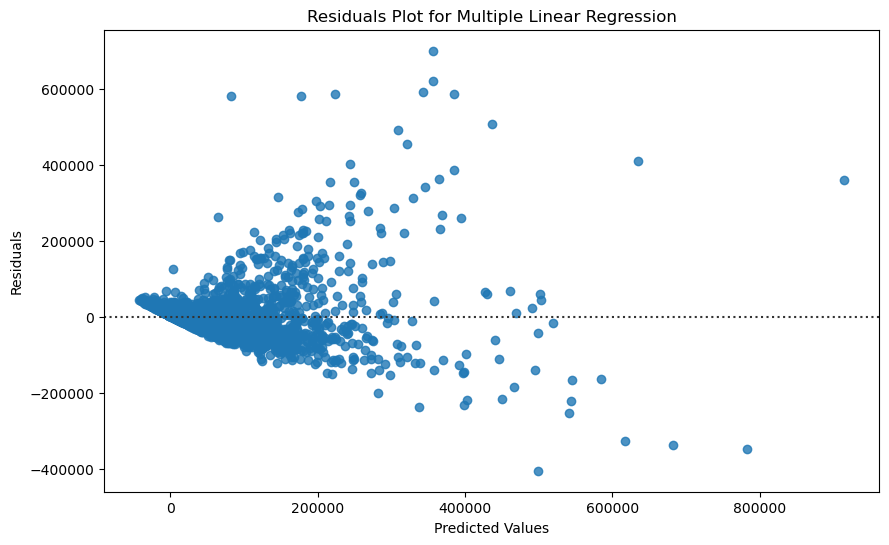

In [10]:
multiple_lm_train_predictions = multiple_lm.predict(X_train)
train_residuals = y_train - multiple_lm_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=multiple_lm_train_predictions, y=train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Multiple Linear Regression")

mult_resid_plot_path = os.path.join(plots_dir, 'mult_resid_plot.png')
plt.savefig(mult_resid_plot_path)
plt.show()

In [11]:
errors = y_test - multiple_lm_predictions

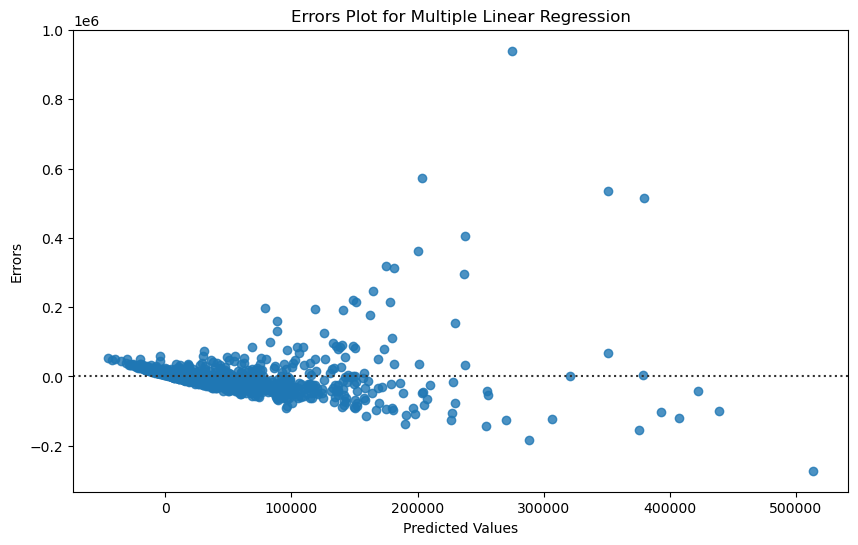

In [12]:

plt.figure(figsize = (10, 6))
sns.residplot(x=multiple_lm_predictions, y=errors)
plt.xlabel("Predicted Values")
plt.ylabel("Errors")
plt.title("Errors Plot for Multiple Linear Regression")

mult_error_plot_path = os.path.join(plots_dir, 'mult_error_plot.png')
plt.savefig(mult_error_plot_path)
plt.show()

This residual plot violates heteroskedascity of residuals. It has a "megaphone" shape which suggests that **weighted least** squares may be used as a remedial measure. This megaphone structure is also displayed in the test set (errors plot).

## Weighted Least Squares

1. Regress absolute residuals from the unweighted OLS regression model on the predictors
2. The estimated standard deviation function is the regressed residuals from step 1. Use these to calculate the weight matrix (nxn)
3. Calculate the WLS estimators using the normal equations of WLS 
$$b_w = (X'WX)^{-1}X'WY$$

In [13]:
residuals_ols = LinearRegression()
residuals_ols.fit(X_train, np.abs(train_residuals))

predicted_abs_residuals = residuals_ols.predict(X_train)
print(predicted_abs_residuals)

[ 2538.341  26843.0727 12530.1731 ... 10142.255  32229.9514 16476.5458]


In [14]:
# Calculating WLS by hand

weights = 1 / predicted_abs_residuals
weight_matrix = np.diag(weights)

n_train = len(y_train)

X_np = X_train.to_numpy()
ones = np.ones((n_train, 1))
# X_matrix is using the training data
X_matrix = np.hstack((ones, X_np))
Y_matrix = y_train.to_numpy()

# formula for wls coefficients b using normal equations
# XtWX_inv = np.linalg.inv(X_matrix.T.dot(weight_matrix).dot(X_matrix))
# b_wls = XtWX_inv.dot(X_matrix.T).dot(weight_matrix).dot(Y_matrix)
# b_wls

XtWX = X_matrix.T.dot(weight_matrix).dot(X_matrix)
XtWY = X_matrix.T.dot(weight_matrix).dot(Y_matrix)
b_wls = np.linalg.solve(XtWX, XtWY)
b_wls

array([ 1.9265e+06,  1.4525e+02, -8.3710e+04,  6.9508e+04,  1.4099e+03,
       -4.5080e+01, -5.3061e+02, -1.8508e+03, -2.3046e+03,  2.2099e+02,
       -9.6326e+02, -5.3490e+05,  2.7742e+05,  2.3226e+03, -3.2941e+04,
        1.7988e+05,  1.4291e+04, -5.0408e+04,  2.1305e+03, -2.5658e+02,
        1.7468e+03,  3.3738e+00, -8.7363e+02, -3.0201e+04, -2.4845e+03,
       -3.0983e+03, -7.3656e+03, -5.8799e+04,  3.8986e+05,  3.6178e+05,
        3.8904e+05, -2.6611e+05, -5.4944e+20, -2.6093e+05, -1.8898e+03,
       -4.1204e+05,  2.8260e+05,  5.4944e+20,  4.1652e+04,  5.7487e+04,
        7.2570e+04,  6.6918e+04,  9.0122e+04,  9.2731e+03, -1.7977e+04,
       -8.8290e+03, -2.6252e+04,  2.1205e+04,  5.3797e+04, -8.5347e+02,
        1.0066e+04,  3.5992e+03,  5.0100e+04,  1.2247e+04])

In [15]:
n_test = len(y_test)
ones_test = np.ones((n_test, 1))

X_test_np = X_test.to_numpy()
X_test_matrix = np.hstack((ones_test, X_test))

y_wls_predictions = X_test_matrix.dot(b_wls)
y_wls_predictions

array([ 1.9139e+05, -9.9817e+04,  1.5307e+05, -1.5760e+04,  8.9888e+04,
        5.5305e+04, -8.0254e+04,  4.8629e+04,  3.0024e+05,  4.0871e+04,
        9.5054e+03,  1.4033e+05,  3.7014e+05,  4.6452e+05,  2.4442e+05,
        1.0093e+05,  8.1676e+04,  1.6230e+05,  2.2323e+05,  3.3555e+04,
        1.0355e+05,  1.8577e+05,  1.5447e+05, -4.8202e+04, -9.0677e+04,
        2.2879e+05,  1.8983e+05,  1.7694e+05, -7.6242e+04,  7.8805e+04,
        3.0472e+04, -5.2794e+04,  1.2478e+05,  1.7341e+05, -6.3643e+03,
       -7.0653e+04, -3.2907e+04,  2.1742e+05,  2.2285e+04,  1.7146e+05,
        1.4581e+05,  2.7147e+05,  2.8276e+04,  1.8765e+05,  5.3057e+04,
        5.8111e+05, -5.4885e+04,  1.1782e+05, -6.8851e+04, -2.7575e+04,
       -8.0545e+02,  2.0625e+05,  7.2609e+03,  2.8720e+05, -1.5606e+05,
        7.8400e+04, -1.3426e+05,  1.1580e+05,  2.3387e+05,  5.6218e+04,
       -7.2922e+04,  1.0271e+05,  8.1790e+04,  2.4549e+05, -2.3734e+04,
        8.6759e+04,  5.9395e+05,  1.0477e+05,  2.3299e+05,  1.27

In [16]:
y_test.dtypes

dtype('float64')

In [17]:
# Calculating MAPE of test set
wls_mape = mean_absolute_percentage_error(y_test, y_wls_predictions)
print("Multiple Linear Regression MAPE:", round(wls_mape, 4))

# Calculating RMSE of test set
wls_mse = mean_squared_error(y_test, y_wls_predictions)
wls_rmse = np.sqrt(wls_mse)
wls_mae = mean_absolute_error(y_test, y_wls_predictions)
print("Multiple Linear Regression (WLS) MSE:", round(wls_mse, 4))
print("Multiple Linear Regression (WLS) RMSE:", round(wls_rmse, 4))
print("Multiple Linear Regression (WLS) MAE", round(wls_mae, 4))

Multiple Linear Regression MAPE: 5.0916
Multiple Linear Regression (WLS) MSE: 14026562954.1093
Multiple Linear Regression (WLS) RMSE: 118433.7914
Multiple Linear Regression (WLS) MAE 83854.2727


Using **Weighted Least Squares** instead of Ordinary Least Squares does not seem to have helped the predictive power

### WLS Residual Plot

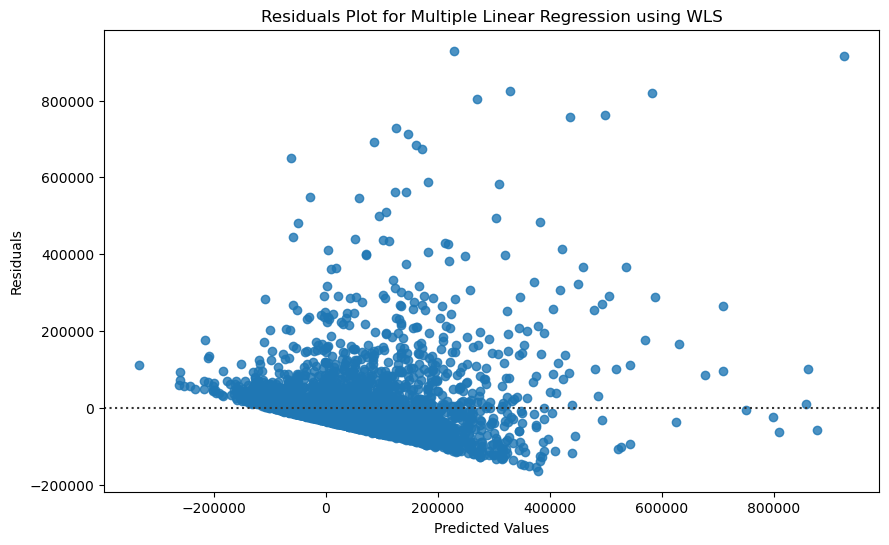

In [18]:
y_train_matrix = y_train.to_numpy()
wls_train_predictions = X_matrix.dot(b_wls)
wls_train_residuals = y_train_matrix - wls_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=wls_train_predictions, y=wls_train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Multiple Linear Regression using WLS")

wls_resid_plot_path = os.path.join(plots_dir, 'wls_resid_plot.png')
plt.savefig(wls_resid_plot_path)
plt.show()

## Log Transformation

In [19]:
# Performing a log transform of the dependent variable y (charges)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

multiple_lm_log = LinearRegression()
multiple_lm_log.fit(X_train, y_train_log)

log_lm_pred = np.exp(multiple_lm_log.predict(X_test))

# Calculating MAPE of test set
log_lm_mape = mean_absolute_percentage_error(y_test, log_lm_pred)
print("Log Multiple Linear Regression MAPE:", round(log_lm_mape, 4))

# Calculating RMSE of test set
log_lm_mse = mean_squared_error(y_test, log_lm_pred)
log_lm_rmse = np.sqrt(log_lm_mse)
log_lm_mae = mean_absolute_error(y_test, log_lm_pred)
print("Log Multiple Linear Regression MSE:", round(log_lm_mse, 4))
print("Log Multiple Linear Regression RMSE:", round(log_lm_rmse, 4))
print("Log Multiple Linear Regression MAE:", round(log_lm_mae, 4))

Log Multiple Linear Regression MAPE: 0.5271
Log Multiple Linear Regression MSE: 11166635120.2069
Log Multiple Linear Regression RMSE: 105672.3006
Log Multiple Linear Regression MAE: 30478.218


### Log Residual Plot

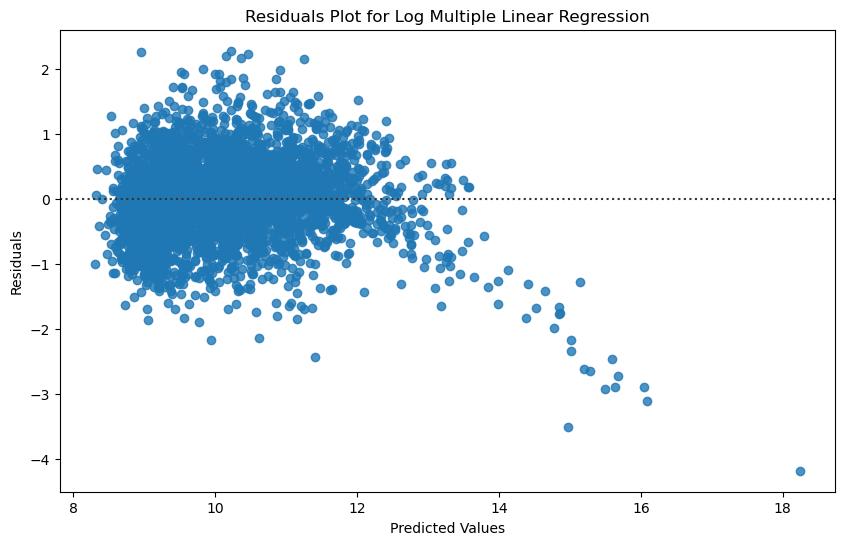

In [20]:
log_lm_train_predictions = multiple_lm_log.predict(X_train)
log_train_residuals = y_train_log - log_lm_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=log_lm_train_predictions, y=log_train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Log Multiple Linear Regression")

log_mult_resid_plot_path = os.path.join(plots_dir, 'log_mult_resid_plot.png')
plt.savefig(log_mult_resid_plot_path)
plt.show()

Residual plot looks much better when catering to assumptions although there are still outliers

# Lasso Regression

In [21]:
# Fitting lasso regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value

min_alpha = 1e-4
max_alpha = 1e4
n_alphas = 1000
# we will use logspace for the set of the alphas to be tested because it ensures more alpha values at the smaller end of the scale
# and less alphas at the higher end of the scale
alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), n_alphas)

lasso_cv = LassoCV(cv = 10, alphas = alphas, random_state = 32, n_jobs = -1).fit(X_train, y_train) # n_jobs allows for parallel processing (uses all available CPU cores)

# alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_
mean_mse = mse_path.mean(axis = 1)

In [22]:
lasso_cv.alpha_

26.38890814457513

The optimal alpha through lasso cross-validation was 26.628

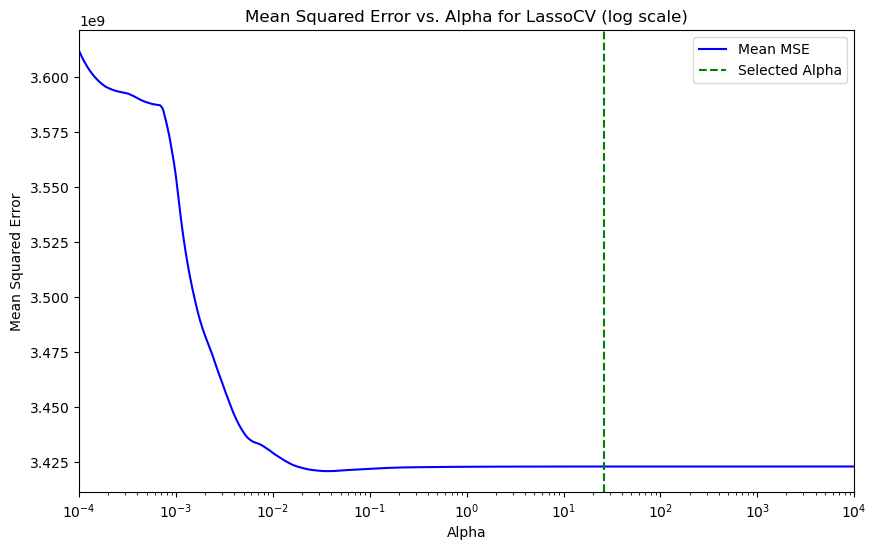

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mse, linestyle='-', color='b', label='Mean MSE')
plt.axvline(lasso_cv.alpha_, color='g', linestyle='--', label='Selected Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha for LassoCV (log scale)')
plt.legend()
plt.xscale('log')
plt.xlim(min_alpha, max_alpha)

lasso_alpha_mse_plot_path = os.path.join(plots_dir, 'lasso_alpha_mse.png')
plt.savefig(lasso_alpha_mse_plot_path)
plt.show()


## Coefficients

In [24]:
predictor_names = X.columns
lasso_coeffs = lasso_cv.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, lasso_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key = lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -42004.5369
dzgroup_coma: -34999.1344
race_black: -33826.4192
race_white: -29906.4976
dzgroup_mosf_w_malig: -19899.9901
diabetes: -12178.8952
dnr_no_dnr: -9509.4610
sfdm2_sip>=30: -9466.5666
death: -8702.1056
dzgroup_cirrhosis: -7812.6095
dzgroup_lung_cancer: -6712.0468
dementia: -6631.9678
sfdm2_no_m2_and_sip_pres_: -4100.7473
dzclass_coma: -3704.9019
dzclass_copd_chf_cirrhosis: -3661.2184
sfdm2_adl>=4_>=5_if_sur_: -2976.6882
sex_male: -1797.8999
hospdead: -1539.9792
sps: -1277.0008
adlsc: -1046.9802
age: -565.0986
dzgroup_copd: -496.5438
dzclass_cancer: -286.6084
wblc: -218.8108
meanbp: -95.2641
d_time: -7.2718
surv2m: 0.0000
dzgroup_colon_cancer: 0.0000
ca_yes: -0.0000
hrt: 6.0765
resp: 149.1947
scoma: 216.1959
sod: 246.0806
prg2m: 305.7355
aps: 378.1460
dnrday: 1007.3363
avtisst: 1159.5413
crea: 1339.3584
slos: 1379.9623
temp: 1621.1018
dnr_dnr_before_sadm: 1710.8235
edu: 2003.0842
hday: 3521.8639
race_hispanic: 4454.7248
ca_no: 5906.2630
dzgroup_chf: 7296.7279
num_co_1: 88

We can see here, by the coefficient values, the signifiance given to each predictor as determined by lasso regularization. This is a stark contrast to the coefficents from multiple linear regression. 

Coefficients with a value of 0 were deduced to be insignificant to the model and thus removed. Only 3 predictors were removed.

## Evaluating Performance

In [25]:
lasso_predictions = lasso_cv.predict(X_test)

# Calculating MAPE of test set
lasso_mape = mean_absolute_percentage_error(y_test, lasso_predictions)
print("Lasso Regression MAPE:", round(lasso_mape, 4))

# Calculating RMSE of test set
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso Regression MSE:", round(lasso_mse, 4))
print("Lasso Regression RMSE:", round(lasso_rmse, 4))


Lasso Regression MAPE: 1.0932
Lasso Regression MSE: 4029300430.2331
Lasso Regression RMSE: 63476.7708


Better MAPE but worse RMSE

# Ridge Regression

In [26]:
# Fitting ridge regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value
ridge = Ridge()
param_grid = {'alpha': alphas}

# using neg_mean_squared_error 
ridge_cv = GridSearchCV(ridge, cv = 10, param_grid = param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1) # no random state, same aplhas range for lasso
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.0000e-04, 1.0186e-04, 1.0376e-04, 1.0569e-04, 1.0765e-04,
       1.0966e-04, 1.1170e-04, 1.1378e-04, 1.1589e-04, 1.1805e-04,
       1.2025e-04, 1.2249e-04, 1.2477e-04, 1.2709e-04, 1.2945e-04,
       1.3186e-04, 1.3432e-04, 1.3682e-04, 1.3936e-04, 1.4196e-04,
       1.4460e-04, 1.4729e-04, 1.5003e-04, 1.5282e-04, 1.5567e-04,
       1...
       5.8582e+03, 5.9673e+03, 6.0783e+03, 6.1914e+03, 6.3067e+03,
       6.4240e+03, 6.5436e+03, 6.6654e+03, 6.7894e+03, 6.9158e+03,
       7.0445e+03, 7.1756e+03, 7.3091e+03, 7.4451e+03, 7.5837e+03,
       7.7248e+03, 7.8686e+03, 8.0150e+03, 8.1642e+03, 8.3161e+03,
       8.4709e+03, 8.6285e+03, 8.7891e+03, 8.9527e+03, 9.1193e+03,
       9.2890e+03, 9.4618e+03, 9.6379e+03, 9.8173e+03, 1.0000e+04])},
             scoring='neg_mean_squared_error')

In [27]:
ridge_best_alpha = ridge_cv.best_params_['alpha'] # best alpha value chosen
ridge_best_alpha

4.174655289253135

The best alpha parameter chosen from 10 fold cross validation was 4.175 based on MSE scoring criteria

In [28]:
ridge_mean_mse = -ridge_cv.cv_results_["mean_test_score"]

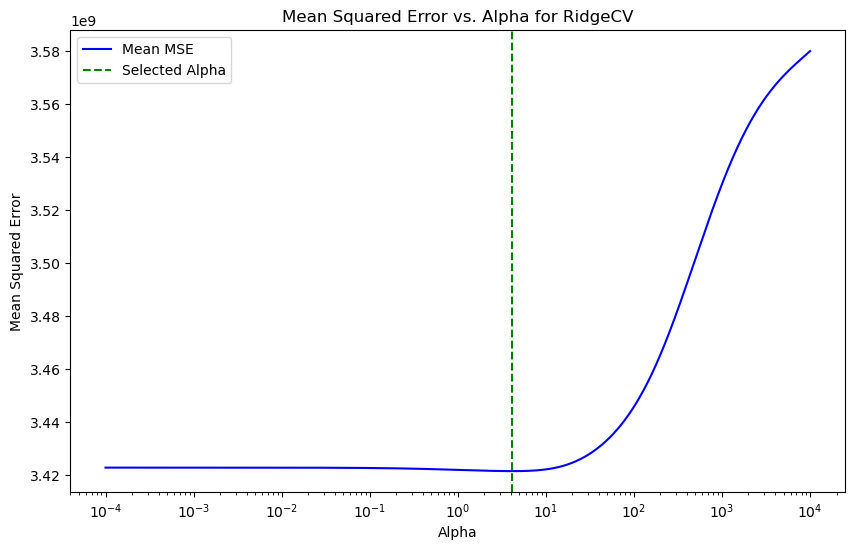

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mean_mse,linestyle='-', color='b', label='Mean MSE')
plt.axvline(ridge_best_alpha, color='g', linestyle='--', label='Selected Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha for RidgeCV')
plt.legend()
plt.xscale('log')

ridge_alpha_mse_plot_path = os.path.join(plots_dir, 'ridge_alpha_mse.png')
plt.savefig(ridge_alpha_mse_plot_path)
plt.show()

## Coefficients

In [30]:
# Access the best estimator
best_ridge = ridge_cv.best_estimator_

# Get the coefficients
ridge_coeffs = best_ridge.coef_

# Map coefficients to predictor names
predictor_names = X.columns
predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, ridge_coeffs)}

# Sort the coefficients
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key=lambda item: item[1]))

# Print the sorted coefficients
for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -41308.4699
race_black: -31591.1258
race_white: -27704.1843
dzgroup_mosf_w_malig: -20098.7667
dzgroup_coma: -19374.7900
dzclass_coma: -19374.7900
diabetes: -12547.5595
sfdm2_sip>=30: -10601.7737
dnr_no_dnr: -9670.0823
death: -8850.7917
dzgroup_cirrhosis: -8739.6078
dementia: -7602.4357
sfdm2_no_m2_and_sip_pres_: -5108.3842
dzgroup_lung_cancer: -4813.9535
sfdm2_adl>=4_>=5_if_sur_: -3968.8033
dzclass_copd_chf_cirrhosis: -3462.9273
dzclass_cancer: -2780.2922
hospdead: -2331.2882
sex_male: -1930.3938
dzgroup_copd: -1467.8595
sps: -1261.9919
adlsc: -1062.8736
age: -561.2336
wblc: -218.2858
ca_yes: -168.7937
meanbp: -95.4843
d_time: -7.2451
hrt: 6.4956
resp: 147.9346
scoma: 221.4197
sod: 246.2175
surv2m: 357.7161
aps: 377.8660
dnrday: 1012.7012
avtisst: 1158.5020
crea: 1339.9345
slos: 1376.8138
prg2m: 1629.7190
temp: 1641.6541
edu: 2014.9085
dzgroup_colon_cancer: 2033.6613
dnr_dnr_before_sadm: 2495.4148
hday: 3521.8422
ca_no: 5926.0269
dzgroup_chf: 6744.5399
race_hispanic: 7196.4019


These Ridge coefficients, surprisingly, are very similar to the coefficients from Lasso Regression

## Evaluating Performance

In [31]:
ridge_predictions = ridge_cv.predict(X_test)

# Calculating MAPE of test set
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
print("Ridge Regression MAPE:", round(ridge_mape, 4))

# Calculating MSE & RMSE of test set
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

print("Ridge Regression MSE:", round(ridge_mse, 4))
print("Ridge Regression RMSE:", round(ridge_rmse, 4))


Ridge Regression MAPE: 1.1043
Ridge Regression MSE: 4031276068.8201
Ridge Regression RMSE: 63492.3308


# Elastic Net

In [32]:
# Fitting Elastic Net regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value 
# and l1_ratio
l1_ratio = np.linspace(0.1, 1, 100)

enet_cv = ElasticNetCV(l1_ratio = l1_ratio, cv = 10, random_state = 32)
enet_cv.fit(X_train, y_train)

# mse_path = enet_cv.mse_path_
# mean_mse_path = mse_path.mean(axis = 1)


ElasticNetCV(cv=10,
             l1_ratio=array([0.1   , 0.1091, 0.1182, 0.1273, 0.1364, 0.1455, 0.1545, 0.1636,
       0.1727, 0.1818, 0.1909, 0.2   , 0.2091, 0.2182, 0.2273, 0.2364,
       0.2455, 0.2545, 0.2636, 0.2727, 0.2818, 0.2909, 0.3   , 0.3091,
       0.3182, 0.3273, 0.3364, 0.3455, 0.3545, 0.3636, 0.3727, 0.3818,
       0.3909, 0.4   , 0.4091, 0.4182, 0.4273, 0.4364, 0.4455, 0.4545,
       0.4636, 0.4727, 0.4818, 0.4909, 0.5   , 0.5091, 0.5182, 0...
       0.5364, 0.5455, 0.5545, 0.5636, 0.5727, 0.5818, 0.5909, 0.6   ,
       0.6091, 0.6182, 0.6273, 0.6364, 0.6455, 0.6545, 0.6636, 0.6727,
       0.6818, 0.6909, 0.7   , 0.7091, 0.7182, 0.7273, 0.7364, 0.7455,
       0.7545, 0.7636, 0.7727, 0.7818, 0.7909, 0.8   , 0.8091, 0.8182,
       0.8273, 0.8364, 0.8455, 0.8545, 0.8636, 0.8727, 0.8818, 0.8909,
       0.9   , 0.9091, 0.9182, 0.9273, 0.9364, 0.9455, 0.9545, 0.9636,
       0.9727, 0.9818, 0.9909, 1.    ]),
             random_state=32)

In [33]:
l1_ratio

array([0.1   , 0.1091, 0.1182, 0.1273, 0.1364, 0.1455, 0.1545, 0.1636,
       0.1727, 0.1818, 0.1909, 0.2   , 0.2091, 0.2182, 0.2273, 0.2364,
       0.2455, 0.2545, 0.2636, 0.2727, 0.2818, 0.2909, 0.3   , 0.3091,
       0.3182, 0.3273, 0.3364, 0.3455, 0.3545, 0.3636, 0.3727, 0.3818,
       0.3909, 0.4   , 0.4091, 0.4182, 0.4273, 0.4364, 0.4455, 0.4545,
       0.4636, 0.4727, 0.4818, 0.4909, 0.5   , 0.5091, 0.5182, 0.5273,
       0.5364, 0.5455, 0.5545, 0.5636, 0.5727, 0.5818, 0.5909, 0.6   ,
       0.6091, 0.6182, 0.6273, 0.6364, 0.6455, 0.6545, 0.6636, 0.6727,
       0.6818, 0.6909, 0.7   , 0.7091, 0.7182, 0.7273, 0.7364, 0.7455,
       0.7545, 0.7636, 0.7727, 0.7818, 0.7909, 0.8   , 0.8091, 0.8182,
       0.8273, 0.8364, 0.8455, 0.8545, 0.8636, 0.8727, 0.8818, 0.8909,
       0.9   , 0.9091, 0.9182, 0.9273, 0.9364, 0.9455, 0.9545, 0.9636,
       0.9727, 0.9818, 0.9909, 1.    ])

In [34]:
enet_cv.l1_ratio_ # l1_ratio chosen by the fit

1.0

Here `l1_ratio = 1.0` corresponds to pure Lasso reression (L1 Regularization) and `l1_ratio = 0` would be the pure Ridge regression (L2 Regularization). Since `ElasticNetCV` selected `1.0`, it means the model has chosen to use pure lasso regression for the optimal performance which we have already performed

# Principal Components Regression

Principal Component regression entails dimension reduction through the principal components (linear combinations of the predictors) and fitting linear regression.

We will need to standardize the predictors because of the highly varying scales

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

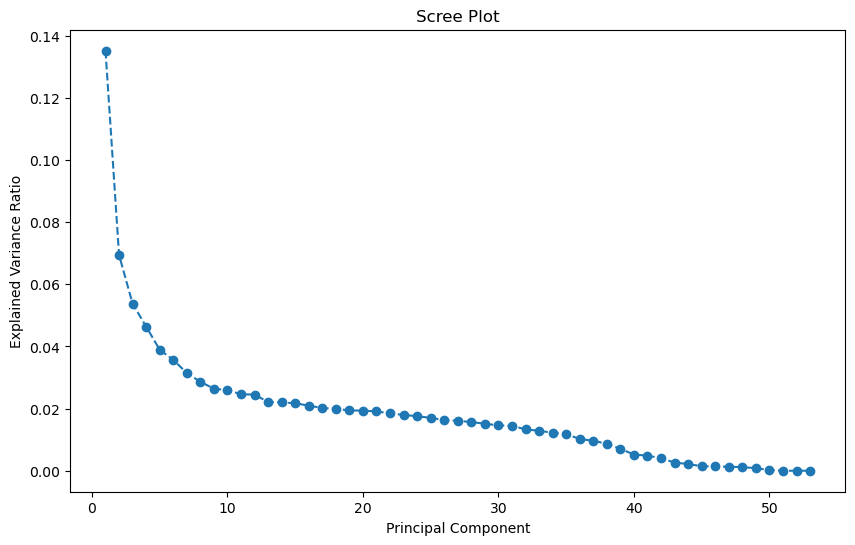

In [36]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

scree_plot_path = os.path.join(plots_dir, 'pcr_scree_plot.png')
plt.savefig(scree_plot_path)

plt.show()


The explained variance seems to flatten out after the 38th principal component

In [37]:
plots_dir = 'linear_model_plots'
# if not os.path.exists(plots_dir):
#     os.makedirs(plots_dir)

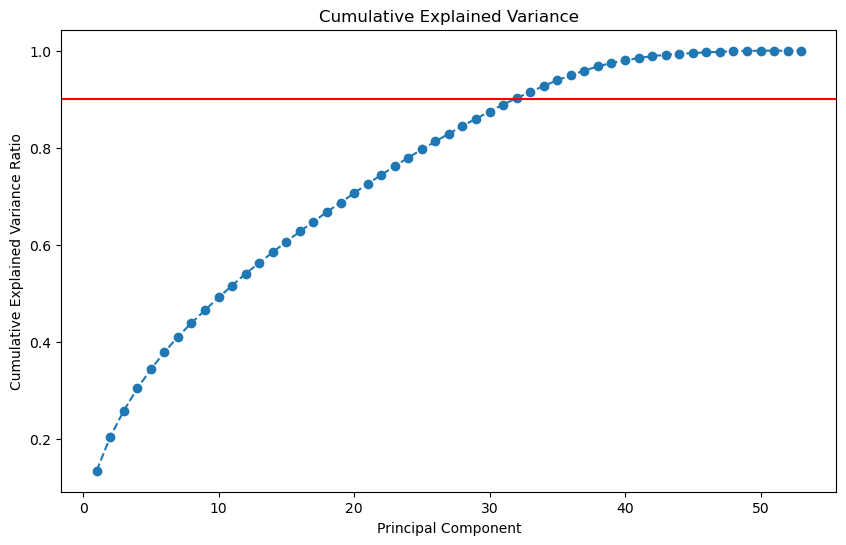

In [38]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')

cumulative_variance_plot_path = os.path.join(plots_dir, 'pcr_cumulative_variance.png')
plt.savefig(scree_plot_path)

plt.show()

The red line represent the cumulative variance of 0.9 which will determine the amount of PC's we use

In [39]:
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
n_components

32

## Fitting PCA

In [40]:
X_train_pca_selected = X_train_pca[:, :n_components]
X_test_pca_selected = X_test_pca[:, :n_components]

regressor = LinearRegression()
regressor.fit(X_train_pca_selected, y_train)

pcr_predictions = regressor.predict(X_test_pca_selected)

# Calculating MAPE of test set
pcr_mape = mean_absolute_percentage_error(y_test, pcr_predictions)
print("PCR Regression MAPE:", pcr_mape)

# Calculating RMSE of test set
pcr_mse = mean_squared_error(y_test, pcr_predictions)
pcr_rmse = np.sqrt(pcr_mse)
print("PCR Regression MSE:", pcr_mse)
print("PCR Regression RMSE:", pcr_rmse)

PCR Regression MAPE: 1.0551790357764699
PCR Regression MSE: 4144394089.9085636
PCR Regression RMSE: 64376.96862938301


# Conclusion

In [42]:
linear_models_scores = {
    'Model': ["Multiple Linear Regression OLS", "Multiple Linear Regression WLS", "Multiple Linear Regression Log Transform", "Lasso Regression", "Ridge Regression", "PCA Regression"],
    'MAPE': [multiple_lm_mape, wls_mape, log_lm_mape, lasso_mape, ridge_mape, pcr_mape],
    'MSE': [multiple_lm_mse, wls_mse, log_lm_mse, lasso_mse, ridge_mse, pcr_mse],
    'RMSE': [multiple_lm_rmse, wls_rmse, log_lm_rmse, lasso_rmse, ridge_rmse, pcr_rmse]
}

linear_scores_df = pd.DataFrame(linear_models_scores).sort_values(by="RMSE")


linear_scores_df

,Model,MAPE,MSE,RMSE
3,Lasso Regression,1.0932,4029300430.2331,63476.7708
4,Ridge Regression,1.1043,4031276068.8201,63492.3308
0,Multiple Linear Regression OLS,1.1278,4035445650.9683,63525.1576
5,PCA Regression,1.0552,4144394089.9086,64376.9686
2,Multiple Linear Regression Log Transform,0.5271,11166635120.2069,105672.3006
1,Multiple Linear Regression WLS,5.0916,14026562954.1093,118433.7914


In [ ]:

Model Evaluation Summary

The regression models evaluated—Lasso, Ridge, Ordinary Least Squares (OLS), and PCA Regression—exhibit closely clustered RMSE values ranging from approximately 63,476 to 64,376. Despite their proximity in performance metrics, the high RMSE magnitudes across all models indicate that they are not effectively capturing the complex dynamics of the dataset, specifically in predicting hospital charges for critically ill patients. This suggests a need to explore more sophisticated approaches, such as non-linear models or advanced machine learning techniques, which might better address the underlying complexities and potential non-linear relationships within the data. 